### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

In [10]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
nan_rows = data.isna().any(axis=1)
print(nan_rows.value_counts())

True     12576
False      108
Name: count, dtype: int64


In [14]:
#let's create a new dataframe so as to not mess the origianl df.
newdf = data.copy()
print(newdf['age'].value_counts())

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


## making some functions for reuse

In [16]:
def convertToNum(row):
    if row['age'] == '50plus':
        return 50
    if row['age'] == 'below21':
        return 21
    return row['age']

def findPercentage(partial, whole):
    value =  round(((partial / whole) * 100.0),2)
    return value


In [17]:
#converting ages 50plus and below21 as 50 and 21 and to an integer so can do numerical comparisons
newdf['convertedAge'] = newdf.apply(convertToNum, axis=1)
print(newdf['convertedAge'].value_counts())
newdf['convertedAge'] = newdf['convertedAge'].astype(int)

convertedAge
21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
21     547
Name: count, dtype: int64


In [18]:
# changing Y column name to 'Accepted' and correcting spelling of passenger in column name
newdf = newdf.rename(columns={'Y' : 'Accepted', 'passanger':'passenger'})

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Coupon acceptance and age')]

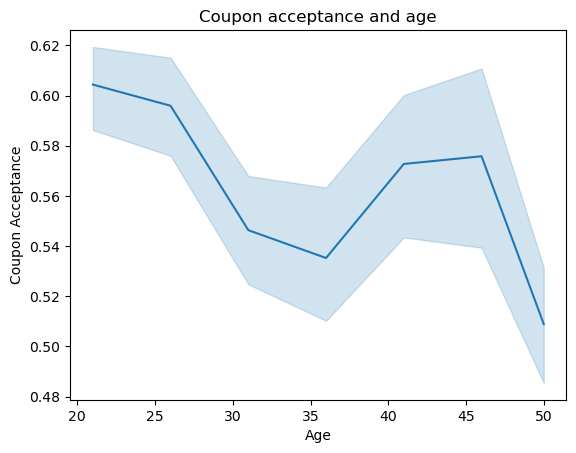

In [19]:
ageCouponDf = sns.lineplot(newdf, x='convertedAge', y='Accepted')
ageCouponDf.set(xlabel='Age', ylabel='Coupon Acceptance', title='Coupon acceptance and age')

**Looks like generally driver of ages 27 and younger tend to accept coupons more than the other ages**

## 3. Decide what to do about your missing data -- drop, replace, other...

In [22]:
# looks like the column 'car' has only 108 non null values so let's drop it
newdf = newdf.drop(columns={'car'})
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [23]:
nan_rows = newdf.isna().any(axis=1)
print(nan_rows.value_counts())

False    12079
True       605
Name: count, dtype: int64


In [24]:
#I want to work with Bar column. Check to see how many nulls we're working with.
newdf[newdf['Bar'].isna()].shape[0]

107

In [25]:
#I want to work with CoffeeHouse column. Check to see how many nulls we're working with.
newdf[newdf['CoffeeHouse'].isna()].shape[0]

217

In [26]:
#I think just removing the columns with nulls work for me
newdf = newdf.dropna(subset=['Bar', 'CoffeeHouse'])

In [27]:
newdf[newdf['CoffeeHouse'].isna()].shape[0]

0

In [28]:
newdf[newdf['Bar'].isna()].shape[0]

0

## 4. What proportion of the total observations chose to accept the coupon? 



In [30]:
totalObv = newdf['Accepted'].count()
print('Total Obeservation = ' + str(totalObv))
totalAccept = newdf.query('Accepted == 1')['Accepted'].count()
print('Total Acceptance = ' + str(totalAccept))

percentageAccepted = findPercentage(totalAccept,totalObv)
print('Total Percetage Acceptance = ' + str(percentageAccepted) + '%')

Total Obeservation = 12402
Total Acceptance = 7074
Total Percetage Acceptance = 57.04%


[Text(0.5, 0, 'Acceptance (0 = No, 1 = Yes)'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Coupons offered and Acceptance')]

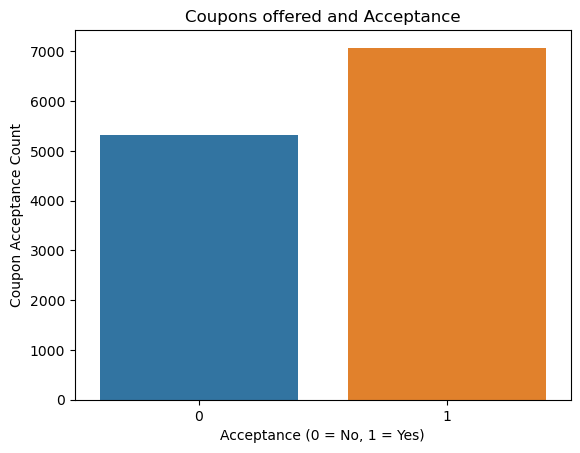

In [31]:
couponTotal = sns.barplot(newdf, x=newdf.Accepted.value_counts().index, y=newdf.Accepted.value_counts())
couponTotal.set(xlabel='Acceptance (0 = No, 1 = Yes)', ylabel='Coupon Acceptance Count', title='Coupons offered and Acceptance')

## 5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 0, 'Coupon Type'),
 Text(0, 0.5, 'Coupon Count'),
 Text(0.5, 1.0, 'Total Coupon Type and Count offered')]

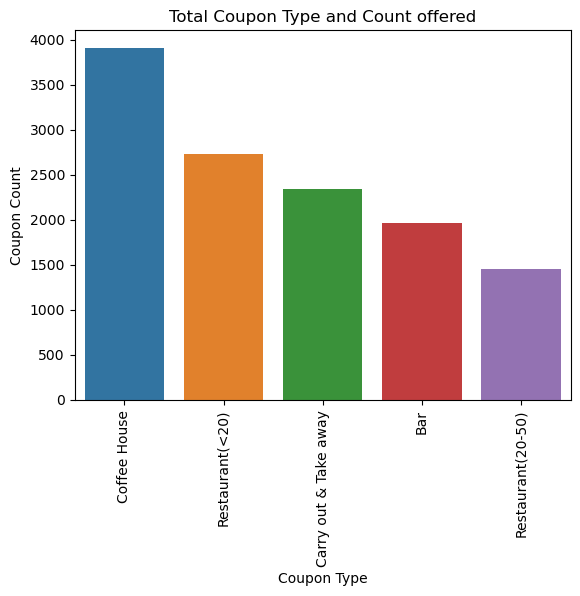

In [33]:
#drawing barplot with x set to coupon types and y set to value counts for each coupon type
couponPlot = sns.barplot(x=newdf.coupon.value_counts().index, y=newdf.coupon.value_counts())
couponPlot.set_xticklabels(couponPlot.get_xticklabels(), rotation=90)
couponPlot.set(xlabel='Coupon Type', ylabel='Coupon Count', title='Total Coupon Type and Count offered')

**Count of all coupons offered**

In [35]:
#seeing all the unique values for coupon column and removing any NaN
print(newdf['coupon'].value_counts())
newdf[newdf['coupon'].isna()].shape[0]

coupon
Coffee House             3908
Restaurant(<20)          2725
Carry out & Take away    2346
Bar                      1966
Restaurant(20-50)        1457
Name: count, dtype: int64


0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9m/0d6w6_l52fd8511dydxn5cjc0000gn/T/ipykernel_22719/181895896.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  couponPlot1.set_xticklabels(couponPlot1.get_xticklabels(), rotation=90)


[Text(0.5, 0, 'Coupon Type'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Total Coupon Type and Acceptance Count')]

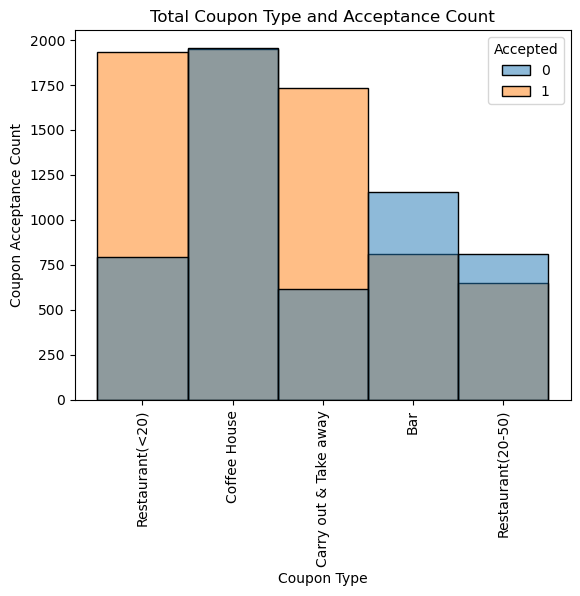

In [36]:
couponPlot1 = sns.histplot(newdf, x='coupon', hue='Accepted')
couponPlot1.set_xticklabels(couponPlot1.get_xticklabels(), rotation=90)
couponPlot1.set(xlabel='Coupon Type', ylabel='Coupon Acceptance Count', title='Total Coupon Type and Acceptance Count')

Seems like coupons most accepted are for restuarants within a 20 min driving range and Coffee Houses.

## 6. Use a histogram to visualize the temperature column.

temperature
80    6389
55    3755
30    2258
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Temperature and Acceptance')]

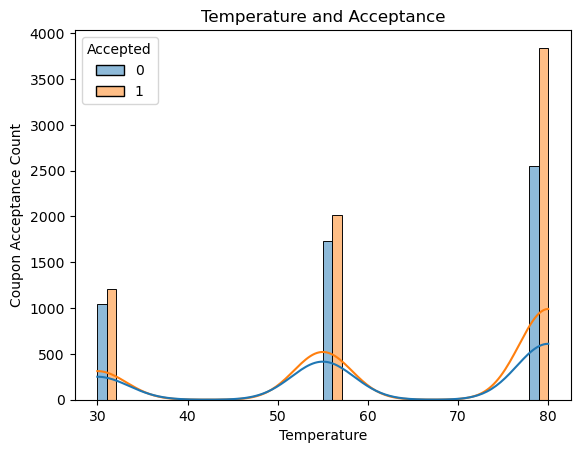

In [39]:
print(newdf['temperature'].value_counts())
#multiple = dodge keeps the bars next to each other than than stacking it.
tempCoupondf = sns.histplot(newdf, x='temperature',kde=True, hue='Accepted', multiple='dodge')
tempCoupondf.set(xlabel='Temperature', ylabel='Coupon Acceptance Count', title='Temperature and Acceptance')

**Looking to see if there is any relationship between coupon acceptance and temperature. There seems to be an uptick in acceptance when the temperature is hotter**

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

## 1. Create a new `DataFrame` that contains just the bar coupons.


In [42]:
#copy from the cleaned df "newdf"
barDf = newdf.query('coupon == "Bar"')

#results from a query has index values that are not sequential 
#reset index creates a sequential index and keeps the non-sequential previous index as "index" column
barDf = barDf.reset_index()

#dropping the non-sequential "index" column to keep just one sequential index
barDf = barDf.drop(columns={'index'})
print(barDf.count())

destination             1966
passenger               1966
weather                 1966
temperature             1966
time                    1966
coupon                  1966
expiration              1966
gender                  1966
age                     1966
maritalStatus           1966
has_children            1966
education               1966
occupation              1966
income                  1966
Bar                     1966
CoffeeHouse             1966
CarryAway               1951
RestaurantLessThan20    1952
Restaurant20To50        1942
toCoupon_GEQ5min        1966
toCoupon_GEQ15min       1966
toCoupon_GEQ25min       1966
direction_same          1966
direction_opp           1966
Accepted                1966
convertedAge            1966
dtype: int64


[Text(0.5, 0, 'Acceptance (0 = No, 1 = Yes)'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar coupons offered and Acceptance')]

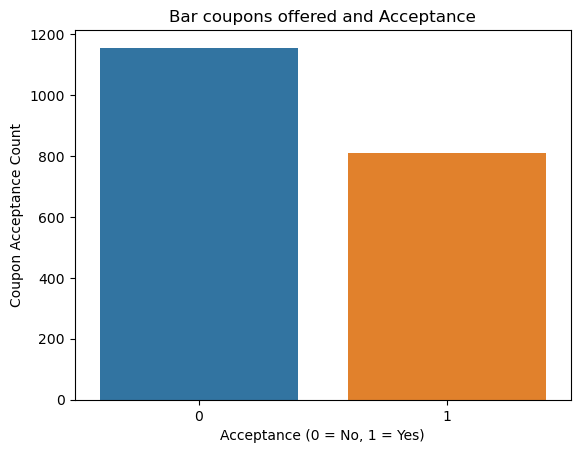

In [43]:
barCouponTotal = sns.barplot(barDf, x=barDf.Accepted.value_counts().index, y=barDf.Accepted.value_counts())
barCouponTotal.set(xlabel='Acceptance (0 = No, 1 = Yes)', ylabel='Coupon Acceptance Count', title='Bar coupons offered and Acceptance')


Comparing acceptance of Bar coupons.

## 2. What proportion of bar coupons were accepted?

In [46]:
barCoAccepted = barDf.query('Accepted == 1').shape[0]
print('Total bar coupons accepted = ' + str(barCoAccepted))

totalBarCo = barDf['coupon'].shape[0]
print('Total bar coupons = ' + str(totalBarCo))

barCoPercentageAccepted = findPercentage(barCoAccepted, totalBarCo)

print('Total portion bar of coupons accepted = ' + str(barCoPercentageAccepted) + '%')


Total bar coupons accepted = 811
Total bar coupons = 1966
Total portion bar of coupons accepted = 41.25%


**Total bar coupons accepted = 827**

**Total bar coupons = 2017**

**Total portion bar of coupons accepted = 41.0%**


## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [49]:
#looking at exiting Bar column values
newdf['Bar'].value_counts()

Bar
never    5109
less1    3438
1~3      2452
4~8      1054
gt8       349
Name: count, dtype: int64

In [50]:
#select from main df where people went to bar less than three times.
#this should include value where Bar is '1~3', 'less1', and 'never'

totalAcceptedLessThan3 = newdf.query('Bar == "1~3" | Bar == "less1" | Bar == "never" ').query('Accepted ==1').shape[0]
print('Total customers who accepted coupons and went to bar less than 3 of fewer times = ' + str(totalAcceptedLessThan3))

#select from main df where people went to bar more than three times.
#this should include value where Bar is '4~8'and 'gt8'

totalAcceptedGreaterThan3 = newdf.query('Bar == "4~8" | Bar == "gt8"').query('Accepted ==1').shape[0]
print('Total customers who accepted coupons and went to bar more than 3 times = ' + str(totalAcceptedGreaterThan3))

totalAccepted = newdf.query('Accepted == 1').shape[0]
print('Total customers who accepted coupons = ' + str(totalAccepted))

barVisitAccpRateLessThan3 = findPercentage(totalAcceptedLessThan3, totalAccepted)
print('Total percentage of customers who accepted coupons and went to bar less than 3 of fewer times = ' + str(barVisitAccpRateLessThan3) + '%')

barVisitAccpRateGreaterThan3 = findPercentage(totalAcceptedGreaterThan3, totalAccepted)
print('Total percentage of customers who accepted coupons and went to bar more than 3 times = ' + str(barVisitAccpRateGreaterThan3) + '%')


Total customers who accepted coupons and went to bar less than 3 of fewer times = 6201
Total customers who accepted coupons and went to bar more than 3 times = 873
Total customers who accepted coupons = 7074
Total percentage of customers who accepted coupons and went to bar less than 3 of fewer times = 87.66%
Total percentage of customers who accepted coupons and went to bar more than 3 times = 12.34%


**Total customers who accepted coupons and went to bar less than 3 of fewer times = 6268**

**Total customers who accepted coupons and went to bar more than 3 times = 887**

**Total customers who accepted coupons = 7210**

**Total percentage of customers who accepted coupons and went to bar less than 3 of fewer times = 86.93%**

**Total percentage of customers who accepted coupons and went to bar more than 3 times = 12.3%**

**When customers are already used to going to bars frequently, coupons aren't as attractive to them**

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar Frequency and Acceptance')]

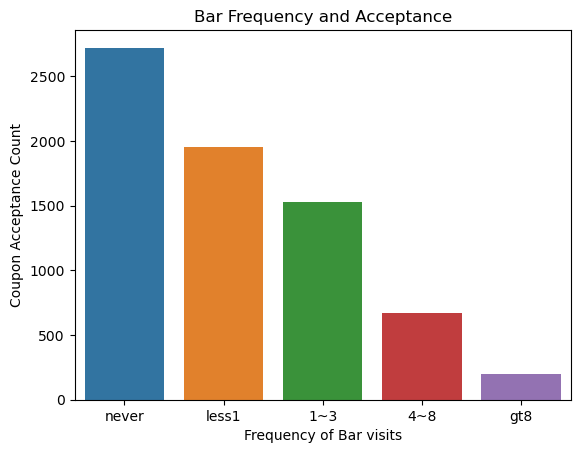

In [53]:
allAcceptedGroup =  newdf.query('Accepted ==1').reset_index().drop(columns={'index'})

allAcceptedGroupPlot = sns.countplot(allAcceptedGroup, x='Bar', order=['never','less1','1~3','4~8','gt8'])

allAcceptedGroupPlot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar Frequency and Acceptance')

**It looks like when coupons are offered to people who aren't used to going to bars, 
they are more likely to accept them**

## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [56]:
allAcceptedGroupOver25Count = newdf.query('Accepted ==1').query('Bar != "less1" & Bar != "never"').query('convertedAge >= 25').shape[0]

allAcceptedGroupUnder25Count = newdf.query('Accepted ==1').query('Bar != "less1" & Bar != "never"').query('convertedAge < 25').shape[0]

allAcceptedGroupConditionalCount = newdf.query('Accepted ==1').query('Bar != "less1" & Bar != "never"').shape[0]

print('Total acceptance for drivers who go to a bar more than once a month and over the age of 25 - ' + str(findPercentage(allAcceptedGroupOver25Count, allAcceptedGroupConditionalCount)) + '%') 
print('Total acceptance for drivers who go to a bar more than once a month and under the age of 25 - ' + str(findPercentage(allAcceptedGroupUnder25Count, allAcceptedGroupConditionalCount)) + '%') 


Total acceptance for drivers who go to a bar more than once a month and over the age of 25 - 70.88%
Total acceptance for drivers who go to a bar more than once a month and under the age of 25 - 29.12%


**Total acceptance for drivers who go to a bar more than once a month and over the age of 25 - 71.65%**

**Total acceptance for drivers who go to a bar more than once a month and under the age of 25 - 28.35%**

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar Frequency and Acceptance. Bar visits greater than 1 and age over 25')]

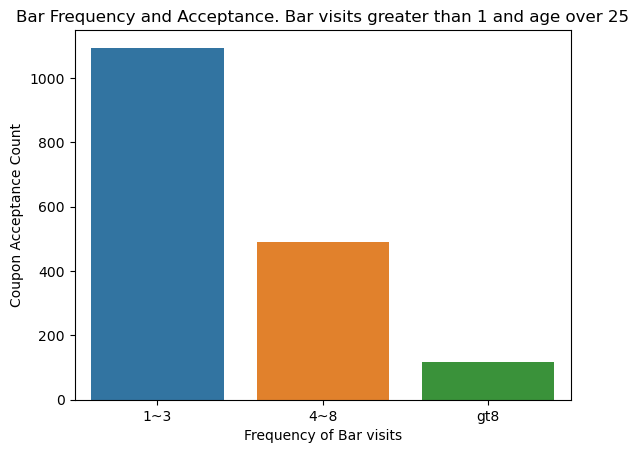

In [58]:
allAcceptedGroupOver25 =  newdf.query('Accepted ==1').query('Bar != "less1" & Bar != "never"').query('convertedAge >= 25').reset_index().drop(columns={'index'})

allAcceptedGroupOver25Plot = sns.countplot(allAcceptedGroupOver25, x='Bar', order=['1~3','4~8','gt8'])

allAcceptedGroupOver25Plot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar Frequency and Acceptance. Bar visits greater than 1 and age over 25')

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar Frequency and Acceptance. Bar visits greater than one and age under 25')]

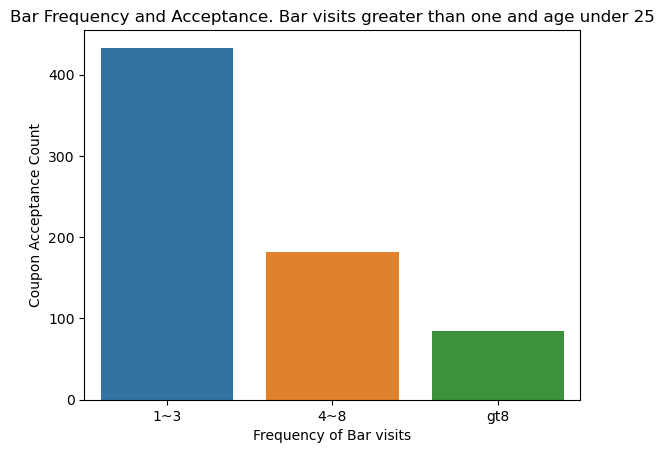

In [59]:
allAcceptedGroupUnder25 =  newdf.query('Accepted ==1').query('Bar != "less1" & Bar != "never"').query('convertedAge < 25').reset_index().drop(columns={'index'})

#sns.histplot(allAcceptedGroupUnder25, x='Bar')
allAcceptedGroupUnder25Plot = sns.countplot(allAcceptedGroupUnder25, x='Bar', order=['1~3','4~8','gt8'])

allAcceptedGroupUnder25Plot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar Frequency and Acceptance. Bar visits greater than one and age under 25')

**It still looks like people who go to bars less accept bar coupons more. More than age, having a more
affordable option is the key**

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [62]:
specialCaseNoKidCount =  newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('passenger != "Kid(s)"').query('occupation != "farming" & occupation != "fishing" & occupation != "forestry"').shape[0]

specialCaseKidCount = newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('passenger == "Kid(s)"').query('occupation != "farming" & occupation != "fishing" & occupation != "forestry"').shape[0]

specialCaseCount = newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('occupation != "farming" & occupation != "fishing" & occupation != "forestry"').shape[0]

print('Total count of drivers who go to bars more than once a month and not in farming, fishing, or forestry - ' + str(specialCaseCount))

print('Total acceptance for drivers who go to bars more than once a month, had no kids as passenger, and not in farming, fishing, or forestry - ' + str(findPercentage(specialCaseNoKidCount, specialCaseCount)) + '%')

print('Total acceptance for drivers who go to bars more than once a month, had kids as passenger, and not in farming, fishing, or forestry - ' + str(findPercentage(specialCaseKidCount, specialCaseCount)) + '%')


Total count of drivers who go to bars more than once a month and not in farming, fishing, or forestry - 2400
Total acceptance for drivers who go to bars more than once a month, had no kids as passenger, and not in farming, fishing, or forestry - 95.04%
Total acceptance for drivers who go to bars more than once a month, had kids as passenger, and not in farming, fishing, or forestry - 4.96%


**Total count of drivers who go to bars more than once a month and not in farming, fishing, or forestry - 2480**

**Total acceptance for drivers who go to bars more than once a month, had no kids as passenger, and not in farming, fishing, or forestry - 94.56%**

**Total acceptance for drivers who go to bars more than once a month, had kids as passenger, and not in farming, fishing, or forestry - 5.44%**

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar visits greater than one, not working in farming, fishing, or forestry, and no kids as passenger')]

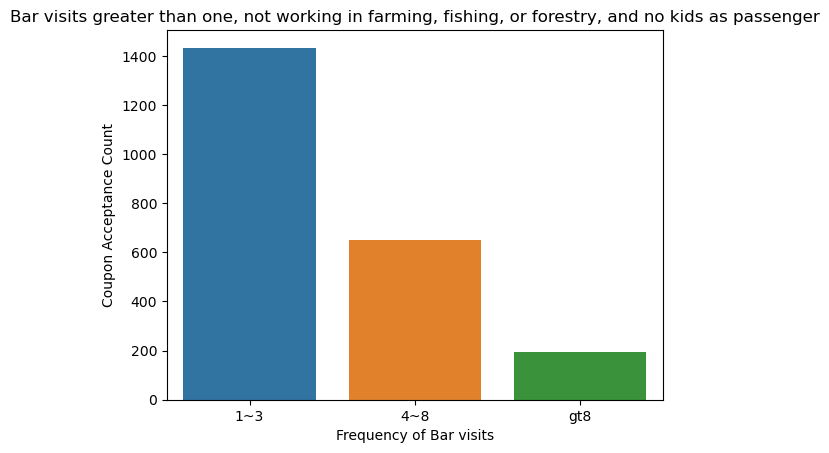

In [64]:
specialCase =  newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('passenger != "Kid(s)"').query('occupation != "farming" & occupation != "fishing" & occupation != "forestry"').reset_index().drop(columns={'index'})

specialCasePlot = sns.countplot(specialCase, x='Bar', order=['1~3','4~8','gt8'])
specialCasePlot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar visits greater than one, not working in farming, fishing, or forestry, and no kids as passenger')

**Coupons are still likely to be accepted more when they aren't frequent bar visitors.**

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar visits greater than one, not working in farming, fishing, or forestry, with kids as passenger')]

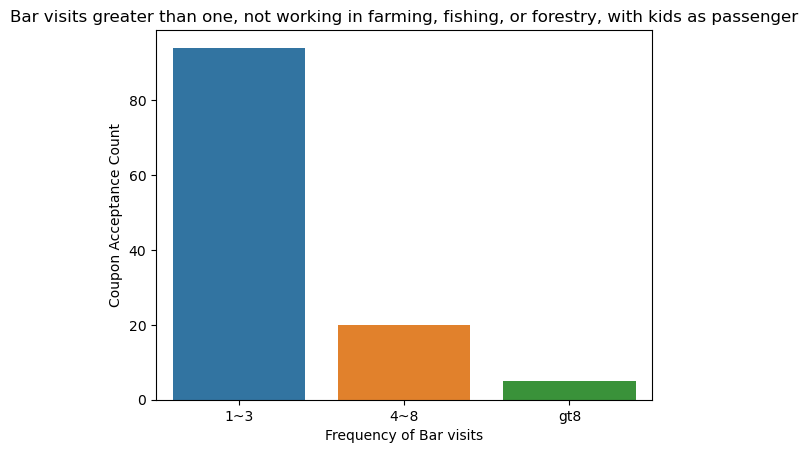

In [66]:
specialCaseKid =  newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('passenger == "Kid(s)"').query('occupation != "farming" & occupation != "fishing" & occupation != "forestry"').reset_index().drop(columns={'index'})

specialCaseKidPlot = sns.countplot(specialCaseKid, x='Bar', order=['1~3','4~8','gt8'])
specialCaseKidPlot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar visits greater than one, not working in farming, fishing, or forestry, with kids as passenger')

**of the coupons offered, acceptacne is low for drivers with kids in the car but even then coupons are more accepted for
the group that goes to bars less**

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



## go to bars more than once a month and are under the age of 30

In [70]:
#getting count of people who go to bar more than once and accepted the coupon and under the age of 30

specialCaseUnder30Count = newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('convertedAge < 30').shape[0]

#getting count of people who go to bar more than once and accepted the coupon and under the age of 30
specialCaseOver30Count = newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('convertedAge > 30').shape[0]

print('Acceptance for people who go to bars more than once a month and under the age of 30 = ' + str(findPercentage(specialCaseUnder30Count, specialCaseOver30Count)) + '%') 

Acceptance for people who go to bars more than once a month and under the age of 30 = 143.16%


**People under the age of 30 who frequent the bar more than once accept the coupons by about 143% more
than people over the age of 30.**

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar visits greater than one and age under 30')]

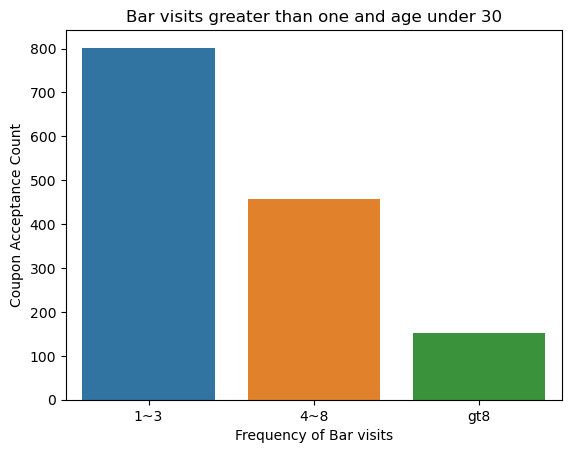

In [72]:
specialCaseUnder30 =  newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('convertedAge < 30').reset_index().drop(columns={'index'})

specialCaseUnder30Plot = sns.countplot(specialCaseUnder30, x='Bar', order=['1~3','4~8','gt8'])

specialCaseUnder30Plot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar visits greater than one and age under 30')

[Text(0.5, 0, 'Frequency of Bar visits'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Bar visits greater than one and age over 30')]

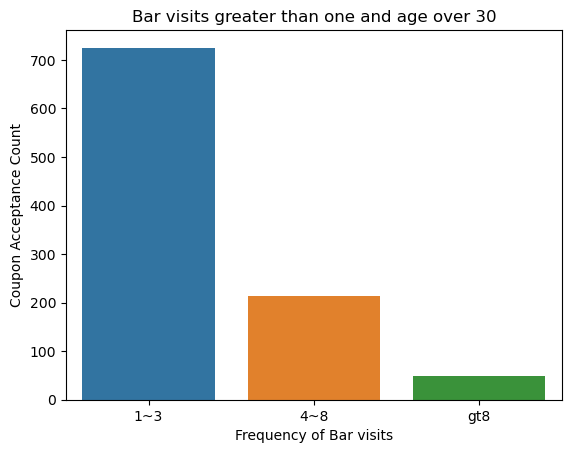

In [73]:
specialCaseOver30 =  newdf.query('Accepted == 1').query('Bar != "less1" & Bar != "never"').query('convertedAge > 30').reset_index().drop(columns={'index'})

specialCaseOver30Plot = sns.countplot(specialCaseOver30, x='Bar', order=['1~3','4~8','gt8'])

specialCaseOver30Plot.set(xlabel='Frequency of Bar visits', ylabel='Coupon Acceptance Count', title='Bar visits greater than one and age over 30')

**when comparing people who accept coupons for under and over the age of 30 by how often they go the bar,
it seems the acceptance rates becomes more prevalent when they frequent the bars more than 4 times**

## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


1. Total portion of the bar coupons accepted overall = 41.0%
2. Total percentage of customers who accepted coupons and went to bar less than 3 of fewer times = 86.93%
3. Total percentage of customers who accepted coupons and went to bar more than 3 times = 12.3%
4. Total acceptance for drivers who go to a bar more than once a month and over the age of 25 - 71.65%
5. Total acceptance for drivers who go to a bar more than once a month and under the age of 25 - 28.35%
6. Total acceptance for drivers who go to bars more than once a month, had no kids as passenger, and not in farming, fishing, or forestry - 94.56%
7. Total acceptance for drivers who go to bars more than once a month, had kids as passenger, and not in farming, fishing, or forestry - 5.44%
8. Acceptance for people who go to bars more than once a month and under the age of 30 = 143.16%
%

**Hypothesis - 
It seems drivers who don't frequently go to bars are attracted by coupons to the bars and hence tend to accept the coupons more. It also seems that drivers under the age of 25 are more ready to accept Bar coupons than drivers of ages above 25. Having kids in the car also seem to deter drivers from accepting Bar coupons probably because of the child factor**


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Coffee Coupons

In [79]:
#making a new dataframe for Coffee shop analysis
coffeeDf = newdf.copy()
coffeeDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12402 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12402 non-null  object
 1   passenger             12402 non-null  object
 2   weather               12402 non-null  object
 3   temperature           12402 non-null  int64 
 4   time                  12402 non-null  object
 5   coupon                12402 non-null  object
 6   expiration            12402 non-null  object
 7   gender                12402 non-null  object
 8   age                   12402 non-null  object
 9   maritalStatus         12402 non-null  object
 10  has_children          12402 non-null  int64 
 11  education             12402 non-null  object
 12  occupation            12402 non-null  object
 13  income                12402 non-null  object
 14  Bar                   12402 non-null  object
 15  CoffeeHouse           12402 non-null  obj

In [80]:
#how frequently drivers go to coffee houses?
coffeeDf['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3342
1~3      3203
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Acceptance of Coffee House coupons by age')]

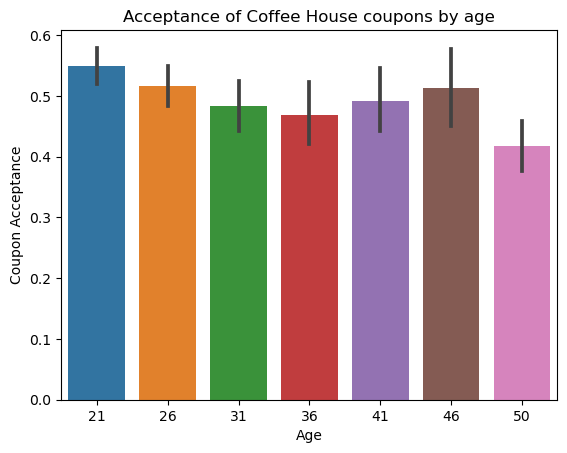

In [81]:
coffeHousePlot = sns.barplot(coffeeDf.query('coupon == "Coffee House"'), x='convertedAge',y='Accepted')

coffeHousePlot.set(xlabel='Age', ylabel='Coupon Acceptance', title='Acceptance of Coffee House coupons by age')


**People under the age of 21 seem to accept coffeehouse coupons the most.**

**People over the age of 51 don't seem to accept coffehouse coupons as much as other age groups**

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Acceptance of Coffee House coupons by Time of day by drivers under age 21')]

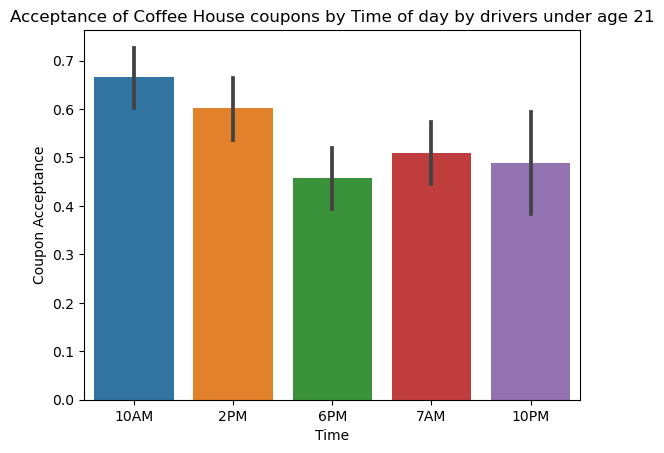

In [83]:
#looking bit more in the age group under 21 years old
under20Df = coffeeDf.query('coupon == "Coffee House"').query('convertedAge <= 21').reset_index().drop(columns={'index'})
under20DfPlot = sns.barplot(under20Df, x='time', y='Accepted')
under20DfPlot.set(xlabel='Time', ylabel='Coupon Acceptance', title='Acceptance of Coffee House coupons by Time of day by drivers under age 21')

**for drivers under 21 years of age the time when Coffee House coupons are most accepted is around 10am**

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Acceptance of all Coffee House coupons by Time of day')]

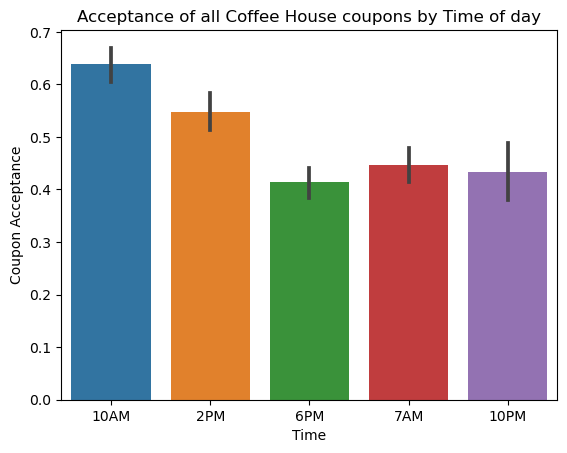

In [85]:
#Now looking at time relationship at Coffee House coupon acceptance for all age groups

coffeeHouseAcceptancePlot = sns.barplot(coffeeDf.query('coupon == "Coffee House"').reset_index().drop(columns={'index'}), x='time',y='Accepted')

coffeeHouseAcceptancePlot.set(xlabel='Time', ylabel='Coupon Acceptance', title='Acceptance of all Coffee House coupons by Time of day')


#for any age group, 10am seems to be the best time to send coffee house coupons

[Text(0.5, 0, 'Income'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Acceptance of all Coffee House coupons at 10am by Income level')]

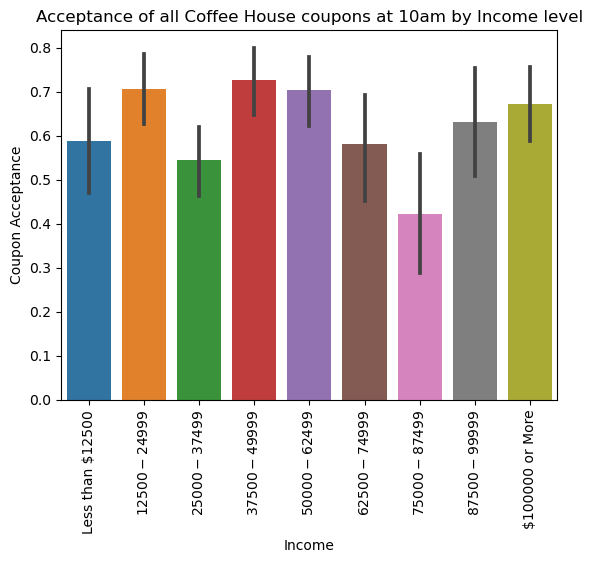

In [87]:
#we're looking to see if CoffeeHouse coupons acceptance has anything do with their coupon

coffeePlot = sns.barplot(coffeeDf.query('coupon == "Coffee House"').query('time == "10AM"').reset_index().drop(columns={'index'}), 
                         x='income', y='Accepted', order=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999',
                                                   '$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
    )
coffeePlot.set_xticklabels(coffeePlot.get_xticklabels(), rotation=90)
coffeePlot.set(xlabel='Income', ylabel='Coupon Acceptance', title='Acceptance of all Coffee House coupons at 10am by Income level')

#

**There isn't a clear linear movement with income when it comes to accepting Coffee House coupons. 
It seems acceptance is the highest for the income range of 37500 - 49999 but it fluctuates a lot
at as income levels changes**

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Acceptance of all Coffee House coupons with respect to temperature')]

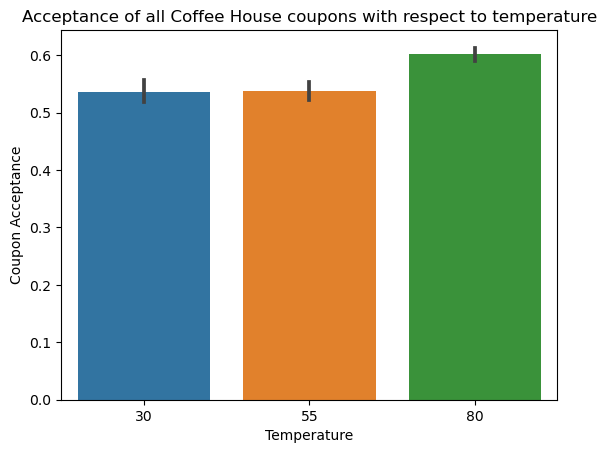

In [89]:
#Checking to see if temperature has anything to do with Coffee coupons

coffeeHouseTempPlot = sns.barplot(coffeeDf, x='temperature', y='Accepted')
coffeeHouseTempPlot.set(xlabel='Temperature', ylabel='Coupon Acceptance', title='Acceptance of all Coffee House coupons with respect to temperature')


**if the temperature is higher, coffee coupons seem to be more accepted, but I don't think this is as prevalent.**

In [91]:
coffeeDf['destination'].value_counts()

destination
No Urgent Place    6125
Home               3170
Work               3107
Name: count, dtype: int64

[Text(0.5, 0, 'Destination'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Acceptance of all Coffee House coupons depending on destination')]

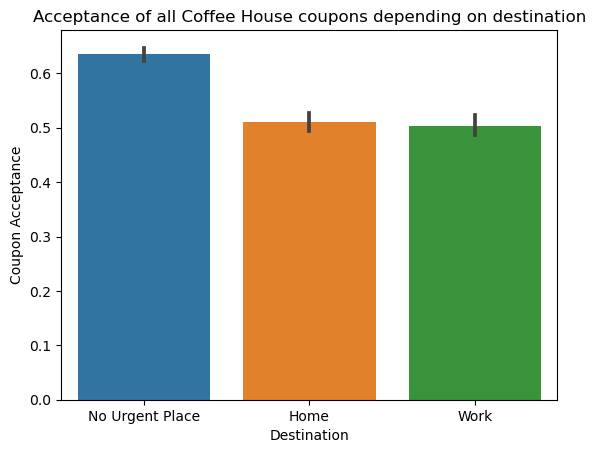

In [92]:
#let's see if their destination play a role in accepting Coffee house coupons.

coffeeHouseDestPlot = sns.barplot(coffeeDf, x='destination', y='Accepted')

coffeeHouseDestPlot.set(xlabel='Destination', ylabel='Coupon Acceptance', title='Acceptance of all Coffee House coupons depending on destination')


**People accept coupons for coffee houses if they're driving around without an urgent destination**

[Text(0.5, 0, 'Coupon Expiration'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Coupon acceptance and expiration')]

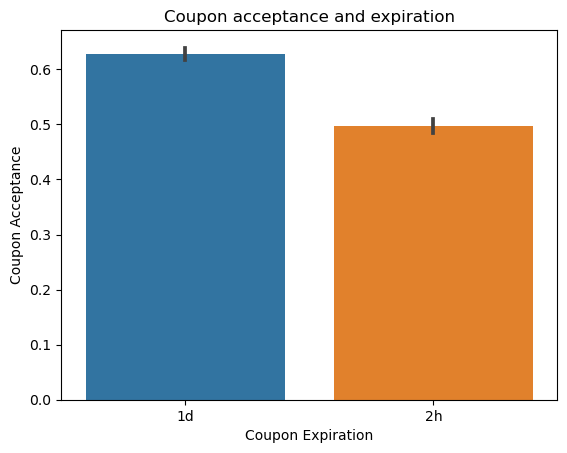

In [94]:
#does the coffee house coupon expiration play a part in their acceptance??

coffeeExpDf = sns.barplot(coffeeDf, x='expiration', y='Accepted')
coffeeExpDf.set(xlabel='Coupon Expiration', ylabel='Coupon Acceptance', title='Coupon acceptance and expiration')


**Coupons that don't expire for a full day are more accepted than ones that expire in 2 hours**

[Text(0.5, 0, 'Coffee House Frequented'),
 Text(0, 0.5, 'Coupon Acceptance'),
 Text(0.5, 1.0, 'Coupon acceptance by the frequency of Coffee House visits')]

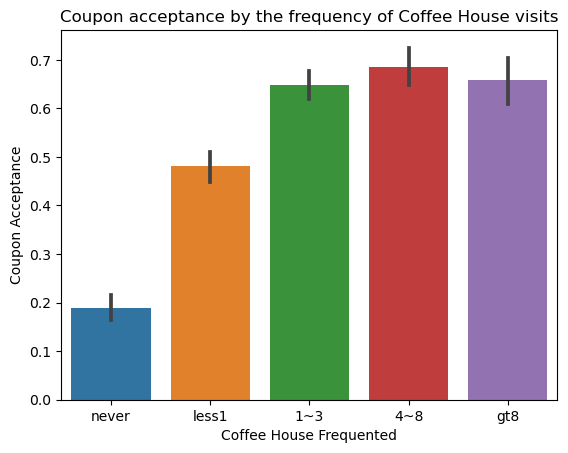

In [96]:
#do the people who frequent coffee houses accept coupons more than ones who don't??

coffeeFreqDf = sns.barplot(coffeeDf.query('coupon == "Coffee House"'), x='CoffeeHouse',
            y='Accepted',order=['never','less1','1~3','4~8','gt8'])

coffeeFreqDf.set(xlabel='Coffee House Frequented', ylabel='Coupon Acceptance', title='Coupon acceptance by the frequency of Coffee House visits')


**Looks like people who freqent coffeehouse more readily accept coffeehouse coupons more.**